In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


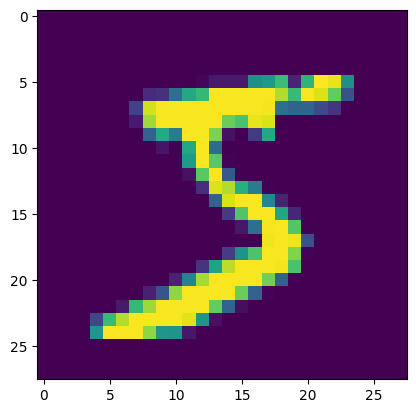

In [5]:
first_image = x_train[0]
plt.imshow(first_image)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10)
])

/home/skamgung/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-06 16:09:04.750761: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
predictions = model(x_train[:1])

In [13]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.0683873 , 0.06907492, 0.2591203 , 0.08999943, 0.07462961,
        0.03813296, 0.12135425, 0.06179362, 0.12079132, 0.09671626]],
      dtype=float32)>

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1],predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=3.2666759490966797>

In [17]:
model.compile(optimizer = 'adam',loss=loss_fn,metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8600 - loss: 0.4798
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9567 - loss: 0.1467
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9680 - loss: 0.1077
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9730 - loss: 0.0859
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9772 - loss: 0.0733


In [19]:
model.evaluate(x_test,y_test,verbose = 2)

313/313 - 1s - 2ms/step - accuracy: 0.9751 - loss: 0.0755


[0.07554946094751358, 0.9750999808311462]

In [20]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[9.6349098e-08, 6.9187056e-10, 2.7225699e-06, 1.1061335e-05,
        5.0472720e-11, 3.7780975e-08, 7.4702121e-13, 9.9998188e-01,
        7.8319921e-08, 4.1152571e-06],
       [3.5606755e-07, 4.8287134e-04, 9.9937361e-01, 1.2399115e-04,
        3.8684442e-12, 1.6812815e-05, 1.2626854e-08, 1.1659404e-10,
        2.4165049e-06, 1.1045089e-11],
       [7.4755116e-07, 9.9827087e-01, 8.2893050e-05, 5.8447795e-06,
        3.3952823e-05, 3.7013122e-06, 2.3941961e-05, 1.2795121e-03,
        2.9642732e-04, 2.1354808e-06],
       [9.9996662e-01, 2.1411067e-08, 5.6513550e-06, 7.0293191e-07,
        1.4066589e-09, 9.2707887e-06, 4.6023242e-06, 1.2525684e-05,
        5.5970775e-09, 6.1717117e-07],
       [1.2002818e-07, 9.6496677e-10, 2.1805526e-07, 7.9861380e-09,
        9.9756050e-01, 4.3224489e-08, 6.5998720e-06, 2.0190932e-05,
        3.9130271e-07, 2.4119562e-03]], dtype=float32)>